In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))



In [3]:
from utils import *
from plottings import *

# Explatory Data Analysis 

In [4]:
df = data_loader('../data/train.csv')

c:\Store-Sales-Forecast-ML\scripts\utils.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


In [5]:
df.shape

(1017209, 9)

In [6]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


## summary of the dataframe

In [9]:
summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Store,int64,0,1017209,1115,"{1: 942, 726: 942, 708: 942, 709: 942, 713: 94..."
1,DayOfWeek,int64,0,1017209,7,"{5: 145845, 4: 145845, 3: 145665, 2: 145664, 1..."
2,Date,object,0,1017209,942,"{'2015-07-31': 1115, '2013-11-06': 1115, '2013..."
3,Sales,int64,0,1017209,21734,"{0: 172871, 5674: 215, 5558: 197, 5483: 196, 6..."
4,Customers,int64,0,1017209,4086,"{0: 172869, 560: 2414, 576: 2363, 603: 2337, 5..."
5,Open,int64,0,1017209,2,"{1: 844392, 0: 172817}"
6,Promo,int64,0,1017209,2,"{0: 629129, 1: 388080}"
7,StateHoliday,object,0,1017209,5,"{'0': 855087, 0: 131072, 'a': 20260, 'b': 6690..."
8,SchoolHoliday,int64,0,1017209,2,"{0: 835488, 1: 181721}"


## No null values in the dataset, so no need to handle missing values

## univariate analysis

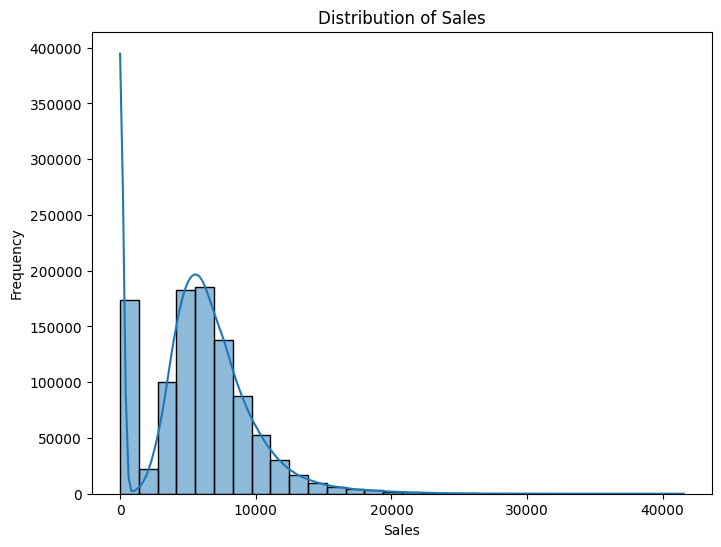

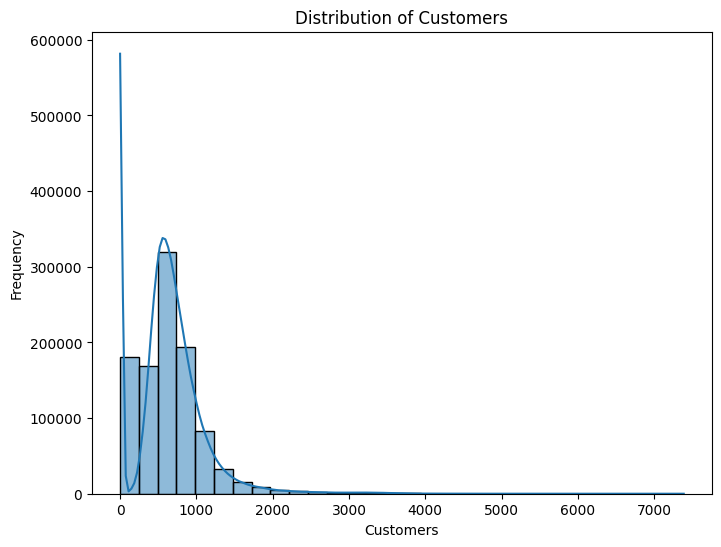

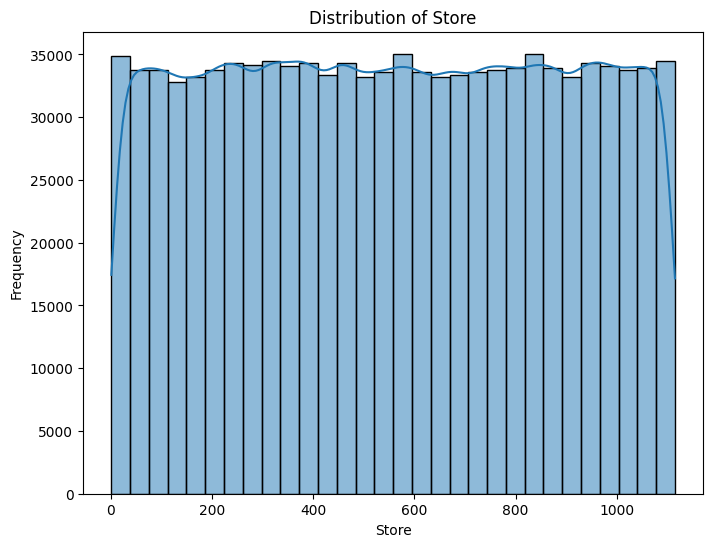

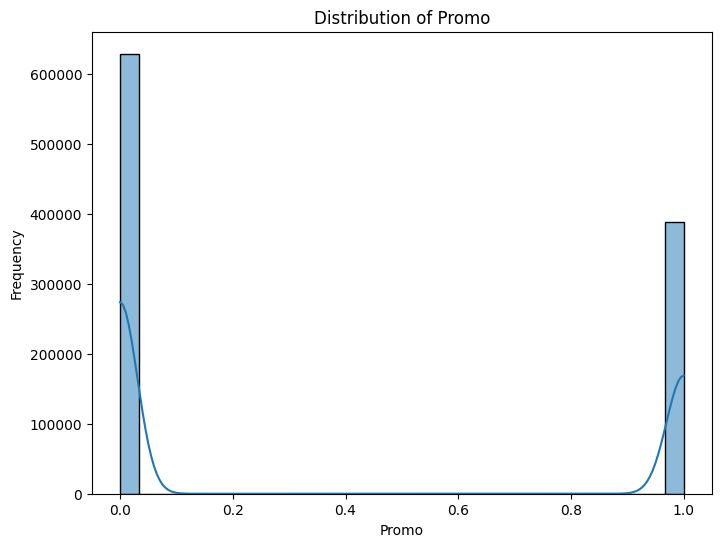

In [10]:
univariate_columns = ['Sales', 'Customers', 'Store', 'Promo']
for col in univariate_columns:
    univariate_analysis(df, col)

## bivariate analysis

##  sales behavior before, during, and after holidays

In [11]:
# Map StateHoliday to meaningful labels
holiday_mapping = {'0': 'Non-Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}
df['HolidayType'] = df['StateHoliday'].map(holiday_mapping)

# Step 3: Shift the holiday column to define before and after holidays
df['PreviousHoliday'] = df['HolidayType'].shift(1)
df['NextHoliday'] = df['HolidayType'].shift(-1)

# Define conditions for before, during, and after holidays
df['HolidayPeriod'] = 'Non-Holiday'
df.loc[df['HolidayType'] != 'Non-Holiday', 'HolidayPeriod'] = 'During Holiday'
df.loc[df['PreviousHoliday'] != 'Non-Holiday', 'HolidayPeriod'] = 'Before Holiday'
df.loc[df['NextHoliday'] != 'Non-Holiday', 'HolidayPeriod'] = 'After Holiday'

# Step 4: Analyze sales behavior by HolidayPeriod
sales_analysis = df.groupby('HolidayPeriod')['Sales'].agg(['mean', 'median', 'sum', 'count'])
print(sales_analysis)

                       mean  median         sum   count
HolidayPeriod                                          
After Holiday   4787.769237  5015.0   776207512  162123
Before Holiday  4311.066562  4449.0    11010464    2554
During Holiday   213.718644     0.0      315235    1475
Non-Holiday     5975.683664  5873.0  5085647412  851057


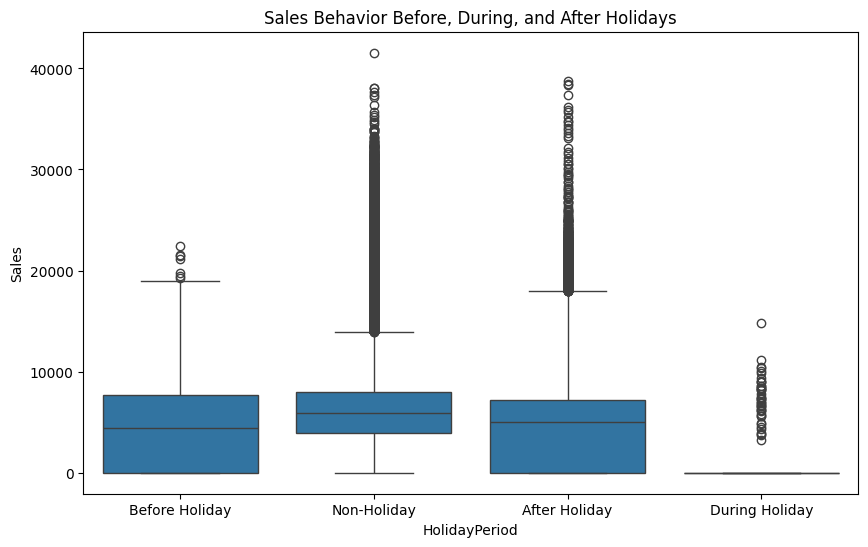

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='HolidayPeriod', y='Sales')
plt.title('Sales Behavior Before, During, and After Holidays')
plt.show()

## Seasonal (Christmas, Easter, etc) purchase behaviors

In [13]:

# Step 1: Define date ranges for major holidays
# Christmas (assumed Dec 24-26), Easter (assumed varies by year, so you'd need to adjust based on the year in your data)
christmas_dates = pd.date_range('2015-12-24', '2015-12-26').union(
                  pd.date_range('2014-12-24', '2014-12-26')).union(
                  pd.date_range('2013-12-24', '2013-12-26'))
# Define a specific range for Easter (e.g., April 3-5 for a given year, adjust according to actual dates)
easter_dates = pd.date_range('2015-04-03', '2015-04-05').union(
               pd.date_range('2014-04-18', '2014-04-20')).union(
               pd.date_range('2013-03-29', '2013-03-31'))

# Step 2: Add a column to indicate whether the date falls during Christmas or Easter
df['IsChristmas'] = df['Date'].isin(christmas_dates)
df['IsEaster'] = df['Date'].isin(easter_dates)

# Step 3: Analyze sales during Christmas and Easter
christmas_sales = df[df['IsChristmas']].groupby('Date')['Sales'].agg(['mean', 'sum', 'count'])
easter_sales = df[df['IsEaster']].groupby('Date')['Sales'].agg(['mean', 'sum', 'count'])

# Print Christmas and Easter sales analysis
print("Christmas Sales Behavior:")
print(christmas_sales)

print("\nEaster Sales Behavior:")
print(easter_sales)

Christmas Sales Behavior:
Empty DataFrame
Columns: [mean, sum, count]
Index: []

Easter Sales Behavior:
Empty DataFrame
Columns: [mean, sum, count]
Index: []


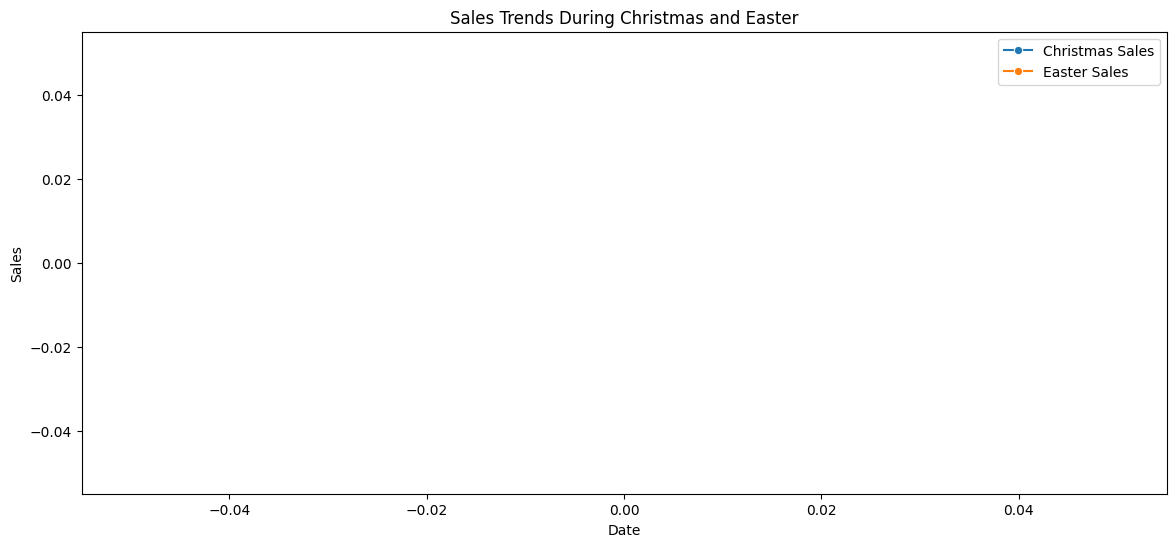

In [14]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df[df['Date'].isin(christmas_dates)], x='Date', y='Sales', label='Christmas Sales', marker='o')
sns.lineplot(data=df[df['Date'].isin(easter_dates)], x='Date', y='Sales', label='Easter Sales', marker='o')
plt.title('Sales Trends During Christmas and Easter')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()